In [26]:
import numpy as np
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#data = np.loadtxt('runs/run9.txt',delimiter=',')
data = np.loadtxt('runs/result_run21.txt', delimiter=',', skiprows=6)

In [34]:
mean_reward = data[:,3]
median_reward = data[:,4]
iteration = data[:,0]
arr_len = iteration.shape[0]
N = 10 # Size of window for running average

# Repeat first and last element to remove edge artifacts (going -> 0)
# Using mode='valid' in the convolution does the same but the arrays shrinks with (N-1) elements.
mean_r = np.zeros((arr_len+N))
med_r = np.zeros((arr_len+N))
mean_r[int(N/2):int(arr_len+N/2)] = mean_reward
mean_r[:int(N/2)] = mean_reward[0]
mean_r[int(arr_len+N/2):] = mean_reward[-1]
med_r[int(N/2):int(arr_len+N/2)] = median_reward
med_r[:int(N/2)] = median_reward[0]
med_r[int(arr_len+N/2):] = median_reward[-1]

# Use convolution for running average of data
mean_rew_conv = np.convolve(mean_r, np.ones((N,))/N, mode='same')[int(N/2):int(arr_len+N/2)]
median_rew_conv = np.convolve(med_r, np.ones((N,))/N, mode='same')[int(N/2):int(arr_len+N/2)]
#mean_rew_conv = np.convolve(mean_reward, np.ones((N,))/N, mode='same')
#median_rew_conv = np.convolve(median_reward, np.ones((N,))/N, mode='same')
#mean_rew_conv = np.convolve(mean_reward, np.ones((N,))/N, mode='full')
#median_rew_conv = np.convolve(median_reward, np.ones((N,))/N, mode='full')

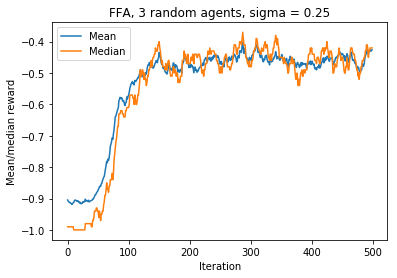

In [37]:
#plt.plot(iteration,mean_reward)
#plt.plot(iteration,median_reward)
#plt.plot(iteration,mean_rew_conv)
#plt.plot(iteration,median_rew_conv)
plt.plot(iteration, mean_rew_conv)
plt.plot(iteration, median_rew_conv)
plt.ylabel('Mean/median reward')
plt.xlabel('Iteration')
sigma = 0.25 # for run21 and run23
#sigma = 0.5 # for run22 and run24
plt.title('FFA, 3 random agents, sigma = ' + str(sigma))
#plt.title('FFA, 3 random agents, sigma = ' + str(sigma))
plt.legend(['Mean','Median'])
#plt.savefig('Plot_run24.png')
plt.show()
